# Galactic Plane Survey of Rubin Observatory's LSST

This notebook explores the footprint of the Rubin Observatory's Galactic Plane survey

In [6]:
import healpy as hp
from os import path
from astropy import units as u
from astropy.coordinates import Galactic, TETE, SkyCoord
from astropy.io import fits
import json
import numpy as np

Load the survey footprint, which is included in the accompanying JSON file

In [5]:
data_file = './rubin_galplane_survey_footprint.json'

with open(data_file, 'r') as f:
    footprint = json.load(f)

print(footprint)

{'nside': 64, 'healpix_resolution_deg': 0.8392936452111668, 'n_healpix': 49152, 'healpix_map': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

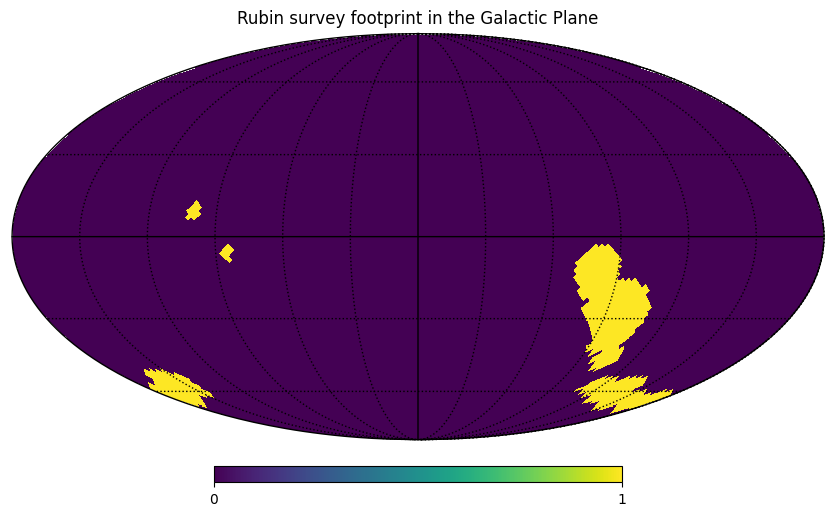

In [10]:
gp_map = np.array(footprint['healpix_map'])

hp.mollview(gp_map, title='Rubin survey footprint in the Galactic Plane')
hp.graticule()

Using this footprint, we can estimate the total area covered in the footprint based on the number of HEALpixels included and the area covered by 1 HEALpixels at the map resolution used. 

In [13]:
pix_area = hp.nside2pixarea(footprint['nside'], degrees = True)
print('1 HEALpixel has area ' + str(pix_area) + 'sq.deg.')

n_pix_in_survey = len(np.where(gp_map > 0.0)[0])
print(str(n_pix_in_survey) + ' HEALpix in survey footprint')

survey_area = n_pix_in_survey * pix_area
print('Total area covered by survey footprint = ' + str(survey_area) + 'sq.deg.')

1 HEALpixel has area 0.8392936452111668sq.deg.
1768 HEALpix in survey footprint
Total area covered by survey footprint = 1483.8711647333428sq.deg.
